### Employee retention score
info.json has epf transactions as well as employee names across months for a party. <br>
Prepare a model for scores of a party if that company has more number of employees <br>
working for a longer period of time.

In [1]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize

pd.options.display.max_columns = None
#pd.set_option('display.max_columns', 50)

#### Reading the 3 json files into dataframe

In [2]:
# deser. from json to python data structure (here, list of dict)
lines = [json.loads(line) for line in open('./data/parties.json', 'r', encoding='utf8')]
party_df = json_normalize(lines)
print("Party", party_df.shape)

lines = [json.loads(line) for line in open('./data/registrations.json', 'r', encoding='utf8')]
reg_df = json_normalize(lines)
print("Registrations", reg_df.shape)

lines = [json.loads(line) for line in open('./data/information.json', 'r', encoding='utf8')]
info_df = json_normalize(lines)
print("Informations", info_df.shape)

Party (14804, 162)
Registrations (15000, 48)
Informations (148259, 25)


In [3]:
party_key_col = '_id.$oid'
party_ids = party_df[party_key_col].unique()
print("Count of unique parties", len(party_ids))
print(party_ids[:10])

Count of unique parties 14804
['54f079716d6f6f6a52582a00' '54f0d8296d6f6f1b7f420500'
 '54f16d906d6f6f1be73aa400' '54f177716d6f6f1b7fadb100'
 '54f17ba96d6f6f1c1171b100' '54f1bca16d6f6f1be7be1f01'
 '54f1d1c46d6f6f1be7533c01' '54f1d5886d6f6f1b7f093401'
 '54f1d5966d6f6f1be7484201' '54f1fb206d6f6f1b7f836501']


#### Get registration for all companies

In [4]:
# Drop features  which have > 80% null values
pct_null = reg_df.isnull().sum() / len(reg_df)
features_to_drop = pct_null[pct_null > 0.8].index

# Reg cols dropped from 48 to 25
reg_df.drop(features_to_drop, axis=1, inplace=True)
print("Registrations after filtering", reg_df.shape)
print("Registration columns", reg_df.columns)

Registrations after filtering (15000, 25)
Registration columns Index(['_type', '_ref', '_model_type', 'normalized_name', 'aliases',
       'has_anomaly', 'acc', 'city', 'country', 'epfo_office',
       'epfo_office_address', 'pin_code', 'primary_business_activity', 'ro',
       'section_applicable', 'state', 'version', 'name', 'nationality',
       '_id.$oid', 'updated_at.$date', 'party_id.$oid', 'sources.in_gov_epf',
       'bots.in_gov_epf_epf_excel_search', 'bots.in_gov_epf_epf_blob_search'],
      dtype='object')


In [5]:
reg_df.head(3)

,_type,_ref,_model_type,normalized_name,aliases,has_anomaly,acc,city,country,epfo_office,epfo_office_address,pin_code,primary_business_activity,ro,section_applicable,state,version,name,nationality,_id.$oid,updated_at.$date,party_id.$oid,sources.in_gov_epf,bots.in_gov_epf_epf_excel_search,bots.in_gov_epf_epf_blob_search
0,Registration,APHYD0059989000,employee_provident_fund,A RUKMA REDDY (MCH CONTRACTOR),[A RUKMA REDDY (MCH CONTRACTOR)],False,ANDHRA PRADESH AND ORISSA,HYDERABAD,India,HYDERABAD,"Bhavishyanidhi Bhawan, No. 3-4-763, Barkatpura...",500079,"ESTABLISHMENTS ENGAGED IN CLEAING,SWEEPING SER...",AP - HYDERABAD,OTHER ESTABLISHMENTS IN WHICH EMPLOYING 20 OR ...,TELANGANA,1.0,A RUKMA REDDY (MCH CONTRACTOR),IN,563b52596d6f6f4414000005,2018-07-04T05:04:10.109Z,59dcbdc1cffef63c4be8d56f,2018-07-04 10:34:09 +0530,2018-07-04 10:34:09 +0530,NaN
1,Registration,APHYD0042162000,employee_provident_fund,ABHIMANYA BAR - RESTARANT,[ABHIMANYA BAR - RESTARANT],False,ANDHRA PRADESH AND ORISSA,HYDERABAD,India,HYDERABAD,"Bhavishyanidhi Bhawan, No. 3-4-763, Barkatpura...",500079,RESTAURANT,AP - HYDERABAD,OTHER ESTABLISHMENTS IN WHICH EMPLOYING 20 OR ...,TELANGANA,1.0,ABHIMANYA BAR - RESTARANT,IN,563b52596d6f6f4414000007,2018-07-03T21:23:37.614Z,59dcbdc1cffef63c4be8d570,2018-07-04 02:53:36 +0530,2018-07-04 02:53:36 +0530,NaN
2,Registration,APHYD0059671000,employee_provident_fund,AKHIL REDDY ENTERPRISES,[AKHIL REDDY ENTERPRISES],False,ANDHRA PRADESH AND ORISSA,HYDERABAD,India,HYDERABAD,"Bhavishyanidhi Bhawan, No. 3-4-763, Barkatpura...",500079,ENGINEERS - ENGG. CONTRACTORS,AP - HYDERABAD,OTHER ESTABLISHMENTS IN WHICH EMPLOYING 20 OR ...,TELANGANA,1.0,AKHIL REDDY ENTERPRISES,IN,563b52596d6f6f4414000009,2018-07-04T04:31:59.110Z,59dcbdc2cffef63c4be8d574,2018-07-04 10:01:58 +0530,2018-07-04 10:01:58 +0530,NaN


In [6]:
info_df.columns

Index(['_ref', '_model_type', 'has_anomaly', 'number', 'credit_date', 'amount',
       'wage_month', 'no_of_employees', 'ecr', 'employee_blob', 'reg_ref',
       '_id.$oid', 'registration_id.$oid', 'updated_at.$date',
       'created_at.$date', 'party_id.$oid', 'sources.in_gov_epf',
       'bots.in_gov_epf_epf_excel_search', 'bots.in_gov_epf_epf_blob_search',
       'passbook', 'cia_party', 'party_id', 'yes_bank', 'rbl', 'anomalies'],
      dtype='object')

#### Merging of reg and info data  based on reg_id and info_id

In [7]:
#reg_info_df = pd.merge(reg_df, info_df, how='outer', left_on=['party_id.$oid', '_id.$oid'], right_on=['party_id.$oid', 'registration_id.$oid'], suffixes=('','_y'))
reg_info_df = pd.merge(reg_df, info_df, how='outer', left_on='_id.$oid', right_on='registration_id.$oid', suffixes=('','_y'))

print("Merged datframe", reg_info_df.shape)
print("Merged columns", reg_info_df.columns)

Merged datframe (157229, 50)
Merged columns Index(['_type', '_ref', '_model_type', 'normalized_name', 'aliases',
       'has_anomaly', 'acc', 'city', 'country', 'epfo_office',
       'epfo_office_address', 'pin_code', 'primary_business_activity', 'ro',
       'section_applicable', 'state', 'version', 'name', 'nationality',
       '_id.$oid', 'updated_at.$date', 'party_id.$oid', 'sources.in_gov_epf',
       'bots.in_gov_epf_epf_excel_search', 'bots.in_gov_epf_epf_blob_search',
       '_ref_y', '_model_type_y', 'has_anomaly_y', 'number', 'credit_date',
       'amount', 'wage_month', 'no_of_employees', 'ecr', 'employee_blob',
       'reg_ref', '_id.$oid_y', 'registration_id.$oid', 'updated_at.$date_y',
       'created_at.$date', 'party_id.$oid_y', 'sources.in_gov_epf_y',
       'bots.in_gov_epf_epf_excel_search_y',
       'bots.in_gov_epf_epf_blob_search_y', 'passbook', 'cia_party',
       'party_id', 'yes_bank', 'rbl', 'anomalies'],
      dtype='object')


#### Select columns for employee retention

In [8]:
cols_to_keep = ['party_id.$oid', 'wage_month', 'no_of_employees']
                #'_id.$oid', 'credit_date',              
emp_df = reg_info_df.filter(cols_to_keep, axis=1)

emp_df.rename(columns = {'party_id.$oid':'party_id',
                         '_id.$oid':'info_id'}, inplace = True)
# 5.7% data was missing
emp_df.dropna(subset=['no_of_employees', 'wage_month'], inplace=True)
print("Merged datframe with selected columns", emp_df.shape, emp_df.columns)

Merged datframe with selected columns (148259, 3) Index(['party_id', 'wage_month', 'no_of_employees'], dtype='object')


#### Converting datatypes of columns
'wage_month' having diff. date formats to common format of type datetime.datetime <br>
'no_of_employees' from str to int

In [9]:
from datetime import datetime

def format_convert_col(str_list):
    dates = []
    
    for s in str_list:
        if s.find('-') != -1:
            d = datetime.strptime(s, '%b-%y')
            #print("if", d)
        else:
            d = datetime.strptime(s, '%m%Y')
            #print("else", d)
        dates.append(d)
    return dates

In [10]:
datesList = format_convert_col( emp_df['wage_month'].tolist() )
print(len(datesList), type(datesList[0]))

emp_df['wage_date'] = datesList
emp_df.drop(['wage_month'], axis=1, inplace=True)

emp_df['no_of_employees'] = emp_df['no_of_employees'].astype(int)

148259 <class 'datetime.datetime'>


- <b>Sort on some columns
- Set index </b>
Can be run once

In [11]:
emp_df.sort_values(by=['party_id', 'wage_date'], inplace=True)
emp_df.set_index(['party_id', 'wage_date'], inplace=True)

print("INDEX", emp_df.index.names)
print(emp_df.columns)

emp_df.loc['5559286e6d6f6f270e4f6d05', '2016-12-01']

INDEX ['party_id', 'wage_date']
Index(['no_of_employees'], dtype='object')


no_of_employees
party_id                 wage_date                  
5559286e6d6f6f270e4f6d05 2016-12-01              111
                         2016-12-01            29751

#### Employee count on monthly basis
There are multiple entries for a (party, wage_date), as seen above

In [12]:
# aggSeries of type Series of size 111584, reduced from 148259
aggSeries = emp_df.groupby(by = ['party_id', 'wage_date'])['no_of_employees'].agg(np.sum)
print(aggSeries.index.names)
aggSeries.loc['5559286e6d6f6f270e4f6d05', '2016-12-01']

['party_id', 'wage_date']


29862

#### aggSeries converted to dataframe without index

In [13]:
emp_agg_df = aggSeries.to_frame()
emp_agg_df.reset_index(inplace=True)

print(emp_agg_df.shape, emp_agg_df.index.names)
print( emp_agg_df.columns)
#emp_agg_df.to_csv("emp_agg.csv")

(111584, 3) [None]
Index(['party_id', 'wage_date', 'no_of_employees'], dtype='object')


#### Computation of aggregate values

In [14]:
# All agg series have party_id as index(from group_by)
aggMinDate = emp_agg_df.groupby(by = ['party_id'])['wage_date'].agg(np.min)
aggMaxDate = emp_agg_df.groupby(by = ['party_id'])['wage_date'].agg(np.max)

assert aggMinDate.shape == aggMaxDate.shape
assert aggMinDate.index.name == aggMaxDate.index.name
print(aggMaxDate[:5])

aggMinEmp = emp_agg_df.groupby(by = ['party_id'])['no_of_employees'].agg('first')
aggMaxEmp = emp_agg_df.groupby(by = ['party_id'])['no_of_employees'].agg('last')
assert aggMinEmp.shape == aggMaxEmp.shape
assert aggMinEmp.index.name == aggMaxEmp.index.name

aggMinEmp.loc['5559286e6d6f6f270e4f6d05'], aggMaxEmp.loc['5559286e6d6f6f270e4f6d05']

party_id
54f079716d6f6f6a52582a00   2018-05-01
54f219a56d6f6f1be7939b01   2018-05-01
555074f66d6f6f21df940300   2018-05-01
555075896d6f6f2192660500   2018-05-01
55507eed6d6f6f21923b2600   2018-05-01
Name: wage_date, dtype: datetime64[ns]


(29862, 25138)

#### Creating new dataframe using the aggregated values

In [15]:
party_emp_df = aggMinDate.to_frame()
party_emp_df.rename(columns={'wage_date':'start_date'}, inplace=True)

party_emp_df['end_date'] = aggMaxDate.tolist() # Assigning series not working

party_emp_df['emp_cnt_start'] = aggMinEmp.tolist()
party_emp_df['emp_cnt_end'] = aggMaxEmp.tolist()

print(party_emp_df.shape, "Index:", party_emp_df.index.name)
print(party_emp_df.columns)

party_emp_df.loc['5559286e6d6f6f270e4f6d05']

(5993, 4) Index: party_id
Index(['start_date', 'end_date', 'emp_cnt_start', 'emp_cnt_end'], dtype='object')


start_date       2016-12-01 00:00:00
end_date         2018-05-01 00:00:00
emp_cnt_start                  29862
emp_cnt_end                    25138
Name: 5559286e6d6f6f270e4f6d05, dtype: object

#### Add 2 columns:
Change in emp <br>
Time period of the data

In [16]:
#For inc. in emp, diff is set to 0
emp_diff = np.where(party_emp_df['emp_cnt_end'] >= party_emp_df['emp_cnt_start'], 0,
                    party_emp_df['emp_cnt_start'] - party_emp_df['emp_cnt_end'])
party_emp_df['emp_diff'] = emp_diff
emp_range = party_emp_df['emp_diff'].max() - party_emp_df['emp_diff'].min()
print("Max dec. of emp", party_emp_df['emp_diff'].idxmax(), party_emp_df['emp_diff'].max())

# period is a Series of timedeltas.Timedelta
time_period = party_emp_df['end_date'] - party_emp_df['start_date']
# Series of int
party_emp_df['time_period'] = pd.to_timedelta(time_period, errors='coerce').dt.days

Max dec. of emp 5568c29d6d6f6f263ac89a08 20808


#### Score = emp_diff/emp_diff_range
score is between 0 and 1

In [17]:
party_emp_df['score'] = 1 - party_emp_df['emp_diff']/emp_range
print(party_emp_df.loc['5568c29d6d6f6f263ac89a08', 'score'])
print(party_emp_df.loc['5559286e6d6f6f270e4f6d05', 'score'])

party_emp_df.head()

party_emp_df.loc['5559286e6d6f6f270e4f6d05']

0.0
0.7729719338715879


start_date       2016-12-01 00:00:00
end_date         2018-05-01 00:00:00
emp_cnt_start                  29862
emp_cnt_end                    25138
emp_diff                        4724
time_period                      516
score                       0.772972
Name: 5559286e6d6f6f270e4f6d05, dtype: object

#### Score = time_period/emp_diff
rel_score is between 0 and 1

The histogram of employee score of parties shows most parties @ score 0.

In [18]:
score_df = party_emp_df.copy()
assert score_df[score_df['emp_diff'] < 0].shape[0] == 0
# emp_diff is only 0 or +ve

scoreList = np.where(score_df['emp_diff'] > 0, score_df['time_period']/score_df['emp_diff'], 1)
#print(len(scoreList), scoreList[:10])

score_range = scoreList.max() - scoreList.min()
print("Min:", scoreList.min(), "Max:", scoreList.max())

score_df['score'] = np.around(scoreList/score_range, decimals=3)
#score_df['score'] = scoreList/score_range

print(score_df.loc['5568c29d6d6f6f263ac89a08', ['score']])
print()
print(score_df.loc['59df5168cffef644dd44f492', ['score']])

Min: 0.045271049596309114 Max: 2527.0
score    0
Name: 5568c29d6d6f6f263ac89a08, dtype: object

score    1
Name: 59df5168cffef644dd44f492, dtype: object


In [19]:
score_df.drop(['start_date', 'end_date', 'emp_cnt_start', 'emp_cnt_end'], axis=1,  inplace=True)
score_df.to_csv("emp_agg1.csv")
score_df.head()

,emp_diff,time_period,score
party_id,,,
54f079716d6f6f6a52582a00,0,577,0.000
54f219a56d6f6f1be7939b01,6,516,0.034
555074f66d6f6f21df940300,4,516,0.051
555075896d6f6f2192660500,8,516,0.026
55507eed6d6f6f21923b2600,0,546,0.000


#### Histogram - freq of score of companies 

0.030202569664608707 0.06655324529540484


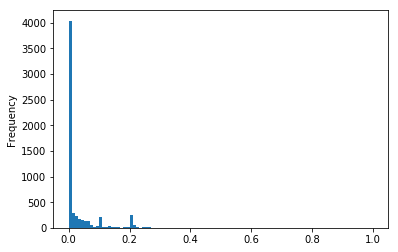

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

print(score_df['score'].mean(), score_df['score'].std())
score_df['score'].plot.hist(bins=100)

#### Score = f(emp_diff / time_period)
rel_score is between 0 and 1

The histogram here is more skewed with most parties @ score 1.

In [21]:
score_df2 = party_emp_df.copy()
scoreList = score_df2['emp_diff']/score_df2['time_period']

score_range = scoreList.max() - scoreList.min()
print("Min:", scoreList.min(), "Max:", scoreList.max())

score_df2['score'] = round(1 - scoreList/score_range, 3)

print(score_df2.loc['5568c29d6d6f6f263ac89a08', ['score']])
print()
print(score_df2.loc['59df5168cffef644dd44f492', ['score']])

Min: 0.0 Max: 22.089171974522294
score    0
Name: 5568c29d6d6f6f263ac89a08, dtype: object

score    1
Name: 59df5168cffef644dd44f492, dtype: object


In [22]:
score_df2.drop(['start_date', 'end_date', 'emp_cnt_start', 'emp_cnt_end'], axis=1,  inplace=True)
score_df2.to_csv("emp_agg2.csv")
score_df2.head()

,emp_diff,time_period,score
party_id,,,
54f079716d6f6f6a52582a00,0,577,1.000
54f219a56d6f6f1be7939b01,6,516,0.999
555074f66d6f6f21df940300,4,516,1.000
555075896d6f6f2192660500,8,516,0.999
55507eed6d6f6f21923b2600,0,546,1.000


0.9980791463619559 0.023735771401921804


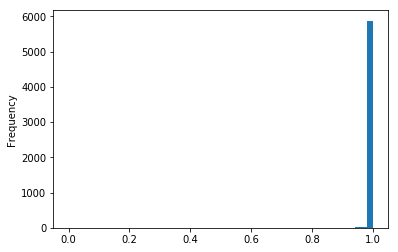

In [23]:
print(score_df2['score'].mean(), score_df2['score'].std())
score_df2['score'].plot.hist(bins=50)